In [0]:
mAPs = [
        ["inception",1000, 0.945],
        ["inception",100 , 0.820],
        ["inception",60  , 0.744],
        ["inception",40  , 0.647],
        ["inception",30  , 0.581],
        ["inception",20  , 0.419],
        ["inception",10  , 0.216],
        ["inception",6  , 0],
        ["inception",3  , 0],
        ["inception",1  , 0],
        ["retinanet",1000, 0.986],
        ["retinanet",100 , 0.934],
        ["retinanet",60  , 0.938],
        ["retinanet",40  , 0.894],
        ["retinanet",30  , 0.829],
        ["retinanet",20  , 0.783],
        ["retinanet",10  , 0.732],
        ["retinanet",6  , 0.477],
        ["retinanet",3  , 0.380],
        ["retinanet",1  , 0.261],
        ["mobilenet",1000, 0.894],
        ["mobilenet",100 , 0.724],
        ["mobilenet",60  , 0.658],
        ["mobilenet",40  , 0.527],
        ["mobilenet",30  , 0.452],
        ["mobilenet",20  , 0.315],
        ["mobilenet",10  , 0.191],
        ["mobilenet",6  , 0],
        ["mobilenet",3  , 0],
        ["mobilenet",1  , 0],
       ]

fps = {"inception": 480,
       "retinanet": 165,
       "mobilenet": 80,
       #"mobilenet_cloud": 120,
      }

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

df_mAP = pd.DataFrame({"inception":{k:score for _, k, score in mAPs[0:10]},
                       "retinanet":{k:score for _, k, score in mAPs[10:20]},
                       "mobilenet":{k:score for _, k, score in mAPs[20:30]}})
df_fps = pd.DataFrame(fps, index=["fps"])

In [0]:
acc = 1.0 - np.power((1.0 - df_mAP.values), (1000 / df_fps.values).astype(int))

In [0]:
from scipy.misc import comb

# detect it with confidence, detect nothing, detect somethig else with confidence

acc = comb()

In [0]:
df_acc = pd.DataFrame(acc, index = df_mAP.index.values, columns=df_mAP.keys())

In [20]:
pd.options.display.float_format = '{:,.10f}'.format
df_acc

,inception,retinanet,mobilenet
1,0.0000000000,0.8371204239,0.0000000000
3,0.0000000000,0.9431997644,0.0000000000
6,0.0000000000,0.9795350761,0.0000000000
10,0.3853440000,0.9996294825,0.9214072909
20,0.6624390000,0.9998955861,0.9893269914
30,0.8244390000,0.9999749979,0.9992665564
40,0.8753910000,0.9999985815,0.9998745896
60,0.9344640000,0.9999999432,0.9999974396
100,0.9676000000,0.9999999173,0.9999998046
1000,0.9969750000,1.0000000000,1.0000000000


          architecture     k        score
0    inception (2 fps)    10 0.6146560000
1    inception (2 fps)    20 0.3375610000
2    inception (2 fps)    30 0.1755610000
3    inception (2 fps)    40 0.1246090000
4    inception (2 fps)    60 0.0655360000
5    inception (2 fps)   100 0.0324000000
6    inception (2 fps)  1000 0.0030250000
7    retinanet (6 fps)    10 0.0003705175
8    retinanet (6 fps)    20 0.0001044139
9    retinanet (6 fps)    30 0.0000250021
10   retinanet (6 fps)    40 0.0000014185
11   retinanet (6 fps)    60 0.0000000568
12   retinanet (6 fps)   100 0.0000000827
13   retinanet (6 fps)  1000 0.0000000000
14  mobilenet (12 fps)    10 0.0785927091
15  mobilenet (12 fps)    20 0.0106730086
16  mobilenet (12 fps)    30 0.0007334436
17  mobilenet (12 fps)    40 0.0001254104
18  mobilenet (12 fps)    60 0.0000025604
19  mobilenet (12 fps)   100 0.0000001954
20  mobilenet (12 fps)  1000 0.0000000000


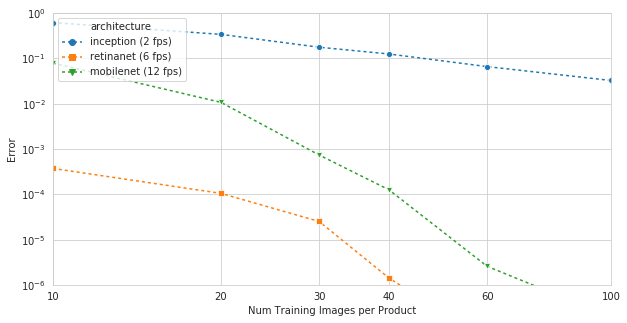

In [6]:
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter, NullFormatter

data = pd.DataFrame([{"k":k,"score":1.0 - df_acc[net][k],"architecture":"{} ({} fps)".format(net, int(1000 / df_fps[net]))} for net in df_acc.keys() for k in df_acc.index.values if not k == "all"])
print(data)


# Plot the responses for different events and regions
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
ax.set(xscale="log",yscale="log")
g = sns.lineplot(x="k", y="score",
                 hue= "architecture",
                 style="architecture",
                 ax=ax,
                 data=data,
                 markers=['o','s','v'],
                 dashes=[(2,2),(2,2),(2,2)])
g.set(xlim = (10,100), ylim = (0.000001, 1.0))
plt.legend(loc='upper left')
#xlabels = ['{}'.format(int(x)) for x in g.get_xticks()]
xlabels = [10, 20, 30, 40, 60, 100]
g.set_xticks(xlabels)
g.set_xticklabels(xlabels)
ax.set(xlabel='Num Training Images per Product', ylabel='Error')
ax.xaxis.set_minor_formatter(NullFormatter()) #ScalarFormatter())
